In [1]:
import time
import xarray as xr

import numpy as np
import numpy.ma as ma

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from   matplotlib.collections import PolyCollection
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from   cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader

import math
import csv  

In [2]:
## Getting the data
#-- Paths
test_folder = '/media/wieser/PortableSSD/Dokumente/TEAMx/icon/ICON_16102017/16102017/'
icon_file = 'ICON_BLM-GUF_20171015T1200Z_CAP02_2D-3D_10min_1km_all_20171016T120000Z.nc'

#-- Getting data
ds_icon = xr.open_dataset(test_folder+icon_file)

In [3]:
for var_name, data_array in ds_icon.data_vars.items():
    long_name = data_array.attrs.get('long_name', 'No long name available')
    units = data_array.attrs.get('units', 'Units not specified')
    print(f"- {var_name}: {long_name}, Units: {units}")

- clon_bnds: No long name available, Units: Units not specified
- clat_bnds: No long name available, Units: Units not specified
- elon_bnds: No long name available, Units: Units not specified
- elat_bnds: No long name available, Units: Units not specified
- height_bnds: No long name available, Units: Units not specified
- height_3_bnds: No long name available, Units: Units not specified
- depth_2_bnds: No long name available, Units: Units not specified
- u: Zonal wind, Units: m s-1
- v: Meridional wind, Units: m s-1
- w: Vertical velocity, Units: m s-1
- temp: Temperature, Units: K
- pres: Pressure, Units: Pa
- qv: Specific humidity, Units: kg kg-1
- qc: specific cloud water content, Units: kg kg-1
- qi: specific cloud ice content, Units: kg kg-1
- qr: specific rain content, Units: kg kg-1
- qs: specific snow content, Units: kg kg-1
- qg: specific graupel content, Units: kg kg-1
- clc: cloud cover, Units: %
- tke: turbulent kinetic energy, Units: m2 s-2
- slope_angle: Slpe angle, Units

In [4]:
#-- Getting the vars
clon = np.rad2deg(ds_icon['clon'])
clat = np.rad2deg(ds_icon['clat'])

var_to_map = np.squeeze(ds_icon['t_2m']).values
topo = np.squeeze(ds_icon['z_ifc']).values #(an approximation, this is not really the topo)
                                            #The topo is in the static fields file. z_ifc are the model layers

#-- Plotting
#-- set projection
projection = ccrs.PlateCarree()
fontsize = 12
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection=projection), figsize=(8,8), constrained_layout = True)
levels = np.arange(min(var_to_map),max(var_to_map),2)
levels_topo = np.arange(min(topo[90]),max(topo[90]),500) # Note that in ICON the higher index is the closer to
                                                         # the surface
cnf = ax.tricontourf(clon,clat,var_to_map,cmap='jet',levels=levels)
topo_plot = ax.tricontour(clon,clat,topo[90],levels=levels_topo,colors='grey',linewidths=0.5)

ax.coastlines()

#-- color bar
cbar = plt.colorbar(cnf, ax=ax,location='bottom');


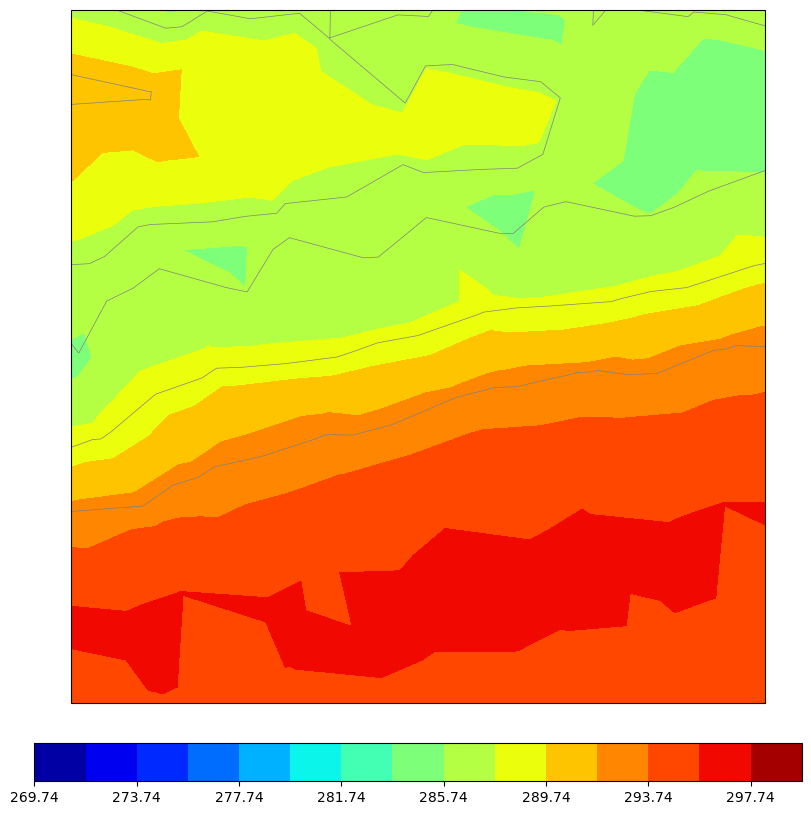

In [20]:
#-- Plotting
#-- set projection
projection = ccrs.PlateCarree()
fontsize = 12
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection=projection), figsize=(8,8), constrained_layout = True)
levels = np.arange(min(var_to_map),max(var_to_map),2)
levels_topo = np.arange(min(topo[90]),max(topo[90]),500) # Note that in ICON the higher index is the closer to
                                                         # the surface
cnf = ax.tricontourf(clon,clat,var_to_map,cmap='jet',levels=levels)
topo_plot = ax.tricontour(clon,clat,topo[90],levels=levels_topo,colors='grey',linewidths=0.5)

ax.coastlines()
ax.set_extent([11.35, 11.45, 47.25, 47.35], crs=ccrs.PlateCarree())
#-- color bar
cbar = plt.colorbar(cnf, ax=ax,location='bottom');

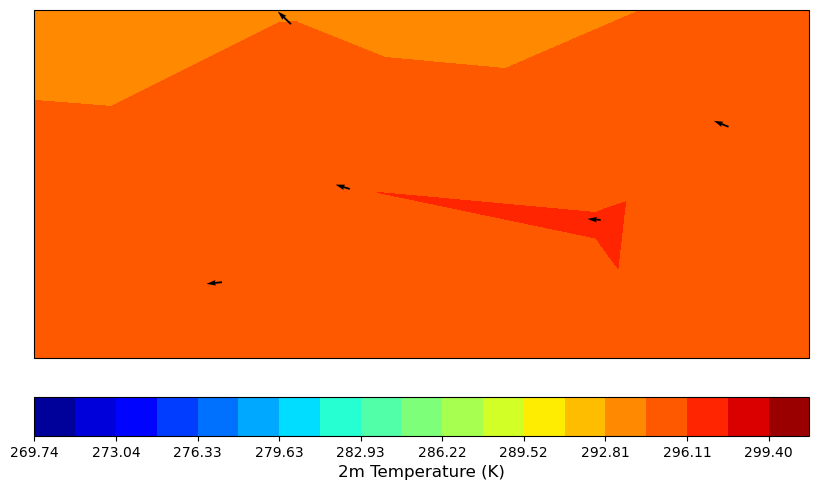

In [32]:
# Paths
test_folder = '/media/wieser/PortableSSD/Dokumente/TEAMx/icon/ICON_16102017/16102017/'
icon_file = 'ICON_BLM-GUF_20171015T1200Z_CAP02_2D-3D_10min_1km_all_20171016T120000Z.nc'

# Load dataset
ds_icon = xr.open_dataset(test_folder + icon_file)

# Extract variables
clon = np.rad2deg(ds_icon['clon'].values)
clat = np.rad2deg(ds_icon['clat'].values)
var_to_map = ds_icon['t_2m'].squeeze()
topo = ds_icon['z_ifc'].squeeze()

# Extract wind components
u_10m = ds_icon['u_10m'].squeeze().values
v_10m = ds_icon['v_10m'].squeeze().values

# Plotting setup
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(10, 10))

# Define skip to thin out vectors for clarity

# Temperature contour plot
temperature_levels = np.linspace(var_to_map.min(), var_to_map.max(), 20)
cnf = ax.tricontourf(clon, clat, var_to_map, levels=temperature_levels, cmap='jet')

# Topography contour plot
# Wind quiver plot, without 2D slicing
ax.quiver(clon, clat, u_10m, v_10m, color='black', scale=50)
ax.set_extent([11.33,11.37,47.254,47.272], crs=projection)
# Add coastlines and color bar
ax.coastlines()
cbar = plt.colorbar(cnf, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('2m Temperature (K)', fontsize=fontsize)

plt.show()

In [6]:
# Select a point and plot it
ibk_lon = 11.384167
ibk_lat = 47.259998

lon_rad = np.radians(ibk_lon)
lat_rad = np.radians(ibk_lat)

def haversine(lon1, lat1, lon2, lat2):
    # Radius of the Earth in kilometers
    R = 6371.0

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Apply Haversine to calculate distances to all points
distances = xr.apply_ufunc(
    haversine,
    lon_rad,
    lat_rad,
    ds_icon.clon,
    ds_icon.clat,
    vectorize=True
)

# Find the index of the minimum distance
min_idx = distances.argmin()

nearest_data = ds_icon.isel(ncells=min_idx)

In [7]:
nearest_data["clc"]

<xarray.DataArray 'clc' (time: 1, height: 90)>
[90 values with dtype=float32]
Coordinates:
    clon     float32 0.1986
    clat     float32 0.8248
  * height   (height) float64 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
  * time     (time) datetime64[ns] 2017-10-16T12:00:00
Attributes:
    standard_name:                clc
    long_name:                    cloud cover
    units:                        %
    param:                        22.6.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [8]:
# Access the data
u_data = nearest_data['z_ifc'] # pres temp
print(u_data)



print(u_data.height_3)

# Access the data
u_data = nearest_data['temp'] # pres temp
print(u_data) # temp defined on height, z_ifc defined on height_3



<xarray.DataArray 'z_ifc' (height_3: 91)>
[91 values with dtype=float32]
Coordinates:
    clon      float32 0.1986
    clat      float32 0.8248
  * height_3  (height_3) float64 1.0 2.0 3.0 4.0 5.0 ... 88.0 89.0 90.0 91.0
Attributes:
    standard_name:                geometric_height_at_half_level_center
    long_name:                    geometric height at half level center
    units:                        m
    param:                        6.3.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1
<xarray.DataArray 'height_3' (height_3: 91)>
array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75., 76

In [9]:
print(u_data["height"])

<xarray.DataArray 'height' (height: 90)>
array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83., 84.,
       85., 86., 87., 88., 89., 90.])
Coordinates:
    clon     float32 0.1986
    clat     float32 0.8248
  * height   (height) float64 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
Attributes:
    standard_name:  height
    long_name:      generalized_height
    axis:           Z
    bounds:         height_bnds


In [10]:
u_data.values

array([[212.30649, 210.63216, 208.9693 , 208.22545, 206.28903, 207.3697 ,
        207.05576, 208.11461, 210.57964, 210.99908, 211.48013, 210.24767,
        212.09055, 214.25916, 217.25188, 220.87604, 224.20282, 227.2396 ,
        230.23213, 233.1182 , 235.82565, 238.37724, 240.79134, 243.3752 ,
        245.67522, 247.64552, 249.65457, 251.54182, 253.45699, 255.02873,
        256.65225, 258.27283, 259.94632, 261.6005 , 263.10812, 264.47177,
        265.65695, 266.89243, 268.01373, 269.08487, 270.12332, 271.12903,
        272.24893, 273.26218, 274.3321 , 275.286  , 276.23798, 277.15875,
        278.01947, 278.84854, 279.57495, 280.28235, 280.91504, 281.53622,
        282.18027, 282.81778, 283.4013 , 283.97076, 284.50232, 285.0161 ,
        285.52557, 286.05283, 286.5881 , 287.1383 , 287.6366 , 288.11887,
        288.53482, 288.94427, 289.36807, 289.7736 , 290.1434 , 290.47018,
        290.79153, 291.12244, 291.47757, 291.7726 , 292.0608 , 292.374  ,
        292.5949 , 292.97232, 293.3287

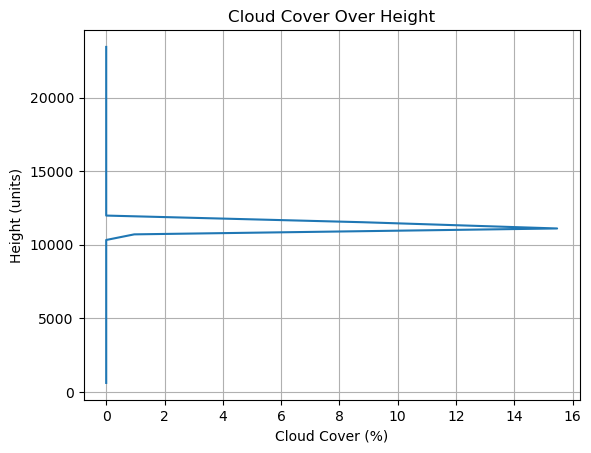

In [11]:
plt.plot(nearest_data['clc'].isel(time=0), nearest_data['z_ifc'][1:])
# Enhancing the plot
plt.title('Cloud Cover Over Height')
plt.ylabel('Height (units)')
plt.xlabel('Cloud Cover (%)')
plt.grid(True)

plt.savefig("cloud_cover.png")
# Show the plot
plt.show()

In [12]:
nearest_data['z_ifc'][1:]

<xarray.DataArray 'z_ifc' (height_3: 90)>
[90 values with dtype=float32]
Coordinates:
    clon      float32 0.1986
    clat      float32 0.8248
  * height_3  (height_3) float64 2.0 3.0 4.0 5.0 6.0 ... 88.0 89.0 90.0 91.0
Attributes:
    standard_name:                geometric_height_at_half_level_center
    long_name:                    geometric height at half level center
    units:                        m
    param:                        6.3.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [13]:
nearest_data['z_ifc'][:90]

<xarray.DataArray 'z_ifc' (height_3: 90)>
[90 values with dtype=float32]
Coordinates:
    clon      float32 0.1986
    clat      float32 0.8248
  * height_3  (height_3) float64 1.0 2.0 3.0 4.0 5.0 ... 87.0 88.0 89.0 90.0
Attributes:
    standard_name:                geometric_height_at_half_level_center
    long_name:                    geometric height at half level center
    units:                        m
    param:                        6.3.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [14]:
print(np.rad2deg(nearest_data.clon).values, np.rad2deg(nearest_data.clat).values) # Values from 3D ICON
# 11.3857
# 47.264 Values from Meteogram

11.3818035 47.255848


In [15]:
nearest_data["qv"]

<xarray.DataArray 'qv' (time: 1, height: 90)>
[90 values with dtype=float32]
Coordinates:
    clon     float32 0.1986
    clat     float32 0.8248
  * height   (height) float64 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
  * time     (time) datetime64[ns] 2017-10-16T12:00:00
Attributes:
    standard_name:                specific_humidity
    long_name:                    Specific humidity
    units:                        kg kg-1
    param:                        0.1.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1